<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Box-Office-Research" data-toc-modified-id="Box-Office-Research-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Box Office Research</a></span></li><li><span><a href="#Data-Uploading-and-Scrubbing" data-toc-modified-id="Data-Uploading-and-Scrubbing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Uploading and Scrubbing</a></span></li><li><span><a href="#Merge-the-different-data-sets-to-one-data-set" data-toc-modified-id="Merge-the-different-data-sets-to-one-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge the different data sets to one data set</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

# Box Office Research

In [60]:
# Importing the Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Uploading and Scrubbing

In [62]:
# Uploading the Data Sheet and creating a Data Frame
df_budget = pd.read_csv('/Users/Vidya/Flatiron/Project/tn.movie_budgets.csv')
df_budget.head()
df_budget.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [63]:
# Formatting the Release Date column
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'], infer_datetime_format=True)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [64]:
# Replacing the '$' sign
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [65]:
# Delete commas from "production_budget,domestic_gross and worldwide_gross columns"
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [66]:
# Importing the re library to remove all spaces from movie column which will help to merge files later
import re
df_budget['movie'] = df_budget['movie'].apply(lambda x: re.sub(r'\W+','',x.lower()))
df_budget.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1867,68,1994-12-23,legendsofthefall,30000000,66502573,160502573
378,79,1996-06-21,thehunchbackofnotredame,100000000,100138851,325500000
3962,63,1984-03-09,thehotelnewhampshire,7500000,5142858,5142858
5467,68,2006-12-31,fengkuangdeshitou,500000,0,3000000
3393,94,2011-12-09,youngadult,12000000,16311571,22750356


In [67]:
# Storing as int64 to hold large numeric values that will help in calculations
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

# Dropping unnecessary columns
df_budget = df_budget.drop(columns = ['id'])
df_budget.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4110,2009-02-13,gomorra,6200000,1579146,37339594
2116,2003-12-12,thestatement,27000000,765637,1545064
170,2008-11-07,madagascarescape2africa,150000000,180174880,599680774
2840,2009-12-30,dasweissebandeinedeutschekindergeschichte,18000000,2222862,25727044
2200,1990-09-19,goodfellas,25000000,46743809,46777347


In [68]:
df_budget['Revenue'] = df_budget['domestic_gross'] + df_budget['worldwide_gross']
df_budget['Profit'] = df_budget['Revenue'] - df_budget['production_budget']
df_budget.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit
1496,1995-09-22,showgirls,40000000,20350754,37750754,58101508,18101508
2994,1982-12-17,tootsie,15000000,177200000,177200000,354400000,339400000
425,2003-12-17,thelordoftheringsthereturnoftheking,94000000,377845905,1141403341,1519249246,1425249246


In [69]:
df_budget.drop_duplicates(subset=None, keep='first')
df_budget.duplicated().value_counts()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit
0,2009-12-18,avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2011-05-20,piratesofthecaribbeanonstrangertides,410600000,241063875,1045663875,1286727750,876127750
2,2019-06-07,darkphoenix,350000000,42762350,149762350,192524700,-157475300
3,2015-05-01,avengersageofultron,330600000,459005868,1403013963,1862019831,1531419831
4,2017-12-15,starwarsepviiithelastjedi,317000000,620181382,1316721747,1936903129,1619903129
...,...,...,...,...,...,...,...
5777,2018-12-31,red11,7000,0,0,0,-7000
5778,1999-04-02,following,6000,48482,240495,288977,282977
5779,2005-07-13,returntothelandofwonders,5000,1338,1338,2676,-2324
5780,2015-09-29,aplaguesopleasant,1400,0,0,0,-1400


False    5782
dtype: int64

In [70]:
# Uploading the Data Sheet and creating a Data Frame for the title_basics file
df_genres = pd.read_csv('/Users/Vidya/Flatiron/Project/title.basics.csv')
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [71]:
# Dropping for any duplicates
df_genres.drop_duplicates(subset=None, keep='first')
df_genres.duplicated().value_counts()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


False    146144
dtype: int64

In [72]:
# Renaming the column original_title
df_genres = df_genres.rename(columns={'original_title' : 'movie'})
df_genres['movie']=df_genres['movie'].astype(str)
df_genres['movie'] = df_genres['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_genres.head()

,tconst,primary_title,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,ashadkaekdin,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,theothersideofthewind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,sabsebadasukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,latelenovelaerrante,2017,80.0,"Comedy,Drama,Fantasy"


In [73]:
# Dropping unnecessary columns
df_genres = df_genres.drop(columns = ['primary_title','start_year'])
df_genres.head()

,tconst,movie,runtime_minutes,genres
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama"
2,tt0069049,theothersideofthewind,122.0,Drama
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama"
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy"


In [74]:
# Uploading the Data Sheet and creating a Data Frame for the title_ratings file
df_rating = pd.read_csv('/Users/Vidya/Flatiron/Project/title.ratings.csv')
df_rating

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [75]:
# Merging files df_genres and df_rating
df_genre_rating = df_genres.merge(df_rating, on='tconst')
df_genre_rating.drop_duplicates(subset=None, keep='first')
df_genre_rating.duplicated().value_counts()

,tconst,movie,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama",7.2,43
2,tt0069049,theothersideofthewind,122.0,Drama,6.9,4517
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,tt9913084,diaboliksonoio,75.0,Documentary,6.2,6
73852,tt9914286,sokaginçocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,albatross,NaN,Documentary,8.5,8
73854,tt9914942,lavidasenselasaraamat,NaN,NaN,6.6,5


False    73856
dtype: int64

In [76]:
# Dropping numvotes column
df_genre_rating = df_genre_rating.drop(columns = ['numvotes'])
df_genre_rating.head()

,tconst,movie,runtime_minutes,genres,averagerating
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama",7.2
2,tt0069049,theothersideofthewind,122.0,Drama,6.9
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama",6.1
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy",6.5


In [77]:
#Extracting the release year fromt the release date
df_budget['release_year'] = pd.DatetimeIndex(df_budget['release_date']).year
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,3536852904,3111852904,2009
1,2011-05-20,piratesofthecaribbeanonstrangertides,410600000,241063875,1045663875,1286727750,876127750,2011
2,2019-06-07,darkphoenix,350000000,42762350,149762350,192524700,-157475300,2019
3,2015-05-01,avengersageofultron,330600000,459005868,1403013963,1862019831,1531419831,2015
4,2017-12-15,starwarsepviiithelastjedi,317000000,620181382,1316721747,1936903129,1619903129,2017


In [78]:
# Creating Data Frame for the tmdb_movies file
df_tmdb_movies = pd.read_csv('/Users/Vidya/Flatiron/Project/tmdb.movies.csv')
df_tmdb_movies = df_tmdb_movies.rename(columns={'original_title' : 'movie'})
df_tmdb_movies ['movie'] = df_tmdb_movies ['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harrypotterandthedeathlyhallowspart1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,howtotrainyourdragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,ironman2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toystory,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186


In [79]:
# Checking for duplicates
df_tmdb_movies.drop_duplicates(subset=None, keep='first')
df_tmdb_movies.info()
df_tmdb_movies.isna().sum()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harrypotterandthedeathlyhallowspart1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,howtotrainyourdragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,ironman2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toystory,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,laboratoryconditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_exhibit_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,thelastone,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,trailermade,0.600,2018-06-22,Trailer Made,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
movie                26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
movie                0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [80]:
# Dropping unnecessary columns
df_tmdb_movies = df_tmdb_movies.drop(columns = ['Unnamed: 0','id','popularity','genre_ids','title','vote_count'])
df_tmdb_movies.head()

,original_language,movie,release_date,vote_average
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7
1,en,howtotrainyourdragon,2010-03-26,7.7
2,en,ironman2,2010-05-07,6.8
3,en,toystory,1995-11-22,7.9
4,en,inception,2010-07-16,8.3


In [81]:
#Extracting the release year fromt the release date
df_tmdb_movies['release_year'] = pd.DatetimeIndex(df_tmdb_movies['release_date']).year
df_tmdb_movies.head(10)

,original_language,movie,release_date,vote_average,release_year
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7,2010
1,en,howtotrainyourdragon,2010-03-26,7.7,2010
2,en,ironman2,2010-05-07,6.8,2010
3,en,toystory,1995-11-22,7.9,1995
4,en,inception,2010-07-16,8.3,2010
5,en,percyjacksontheolympiansthelightningthief,2010-02-11,6.1,2010
6,en,avatar,2009-12-18,7.4,2009
7,en,toystory3,2010-06-17,7.7,2010
8,en,despicableme,2010-07-09,7.2,2010
9,en,megamind,2010-11-04,6.8,2010


# Merge the different data sets to one data set

In [82]:
df_merged = df_genre_rating.merge(df_tmdb_movies, on='movie').merge(df_budget, on='movie')
df_merged.drop_duplicates(subset=None, keep='first',inplace=True)
df_merged.duplicated().value_counts()

False    2968
dtype: int64

In [83]:
df_merged

,tconst,movie,runtime_minutes,genres,averagerating,original_language,release_date_x,vote_average,release_year_x,release_date_y,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year_y
0,tt0249516,foodfight,91.0,"Action,Animation,Comedy",1.9,en,2013-05-07,2.1,2013,2012-12-31,45000000,0,73706,73706,-44926294,2012
1,tt0326592,theovernight,88.0,NaN,7.5,en,2015-06-19,6.0,2015,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
2,tt3844362,theovernight,79.0,"Comedy,Mystery",6.1,en,2015-06-19,6.0,2015,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
3,tt0337692,ontheroad,124.0,"Adventure,Drama,Romance",6.1,en,2012-12-21,5.6,2012,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
4,tt4339118,ontheroad,89.0,Drama,6.0,en,2012-12-21,5.6,2012,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,tt7766254,big,99.0,Documentary,8.5,en,1988-06-03,7.0,1988,1988-06-03,18000000,114968774,151668774,266637548,248637548,1988
3179,tt7784604,hereditary,127.0,"Drama,Horror,Mystery",7.3,en,2018-06-08,7.0,2018,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018
3180,tt8043306,teefaintrouble,155.0,"Action,Comedy,Crime",7.4,ur,2018-07-20,7.6,2018,2018-07-20,1500000,0,98806,98806,-1401194,2018
3181,tt8632862,fahrenheit119,128.0,Documentary,6.7,en,2018-09-10,7.1,2018,2018-09-21,5000000,6352306,6653715,13006021,8006021,2018


In [84]:
# Dropping unwanted columns
df_merged = df_merged.drop(columns = ['release_year_x','release_date_x','vote_average'])

# Dropping duplicate columns based on movie name and release date
df_merged=df_merged.drop_duplicates(subset=['movie','release_date_y'], keep='first')

In [85]:
df_merged.info()
df_merged.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 3182
Data columns (total 13 columns):
tconst               1881 non-null object
movie                1881 non-null object
runtime_minutes      1857 non-null float64
genres               1880 non-null object
averagerating        1881 non-null float64
original_language    1881 non-null object
release_date_y       1881 non-null datetime64[ns]
production_budget    1881 non-null int64
domestic_gross       1881 non-null int64
worldwide_gross      1881 non-null int64
Revenue              1881 non-null int64
Profit               1881 non-null int64
release_year_y       1881 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 205.7+ KB


False    1881
dtype: int64

In [86]:
df_merged = df_merged.rename(columns={'release_date_y' : 'release_date'})
df_merged = df_merged.rename(columns={'release_year_y' : 'release_year'})
df_merged = df_merged.rename(columns={'averagerating' : 'average_rating'})
df_merged = df_merged.drop(columns =['original_language'])
df_merged=df_merged[df_merged['release_year']>2008]
df_merged

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year
0,tt0249516,foodfight,91.0,"Action,Animation,Comedy",1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012
1,tt0326592,theovernight,88.0,NaN,7.5,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
3,tt0337692,ontheroad,124.0,"Adventure,Drama,Romance",6.1,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
6,tt0359950,thesecretlifeofwaltermitty,114.0,"Adventure,Comedy,Drama",7.3,2013-12-25,91000000,58236838,187861183,246098021,155098021,2013
7,tt0365907,awalkamongthetombstones,114.0,"Action,Crime,Drama",6.5,2014-09-19,28000000,26017685,62108587,88126272,60126272,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3175,tt7545524,benisback,103.0,Drama,6.7,2018-12-07,13000000,3703182,9633111,13336293,336293,2018
3176,tt7690670,superfly,116.0,"Action,Crime,Thriller",5.0,2018-06-13,16000000,20537137,20723581,41260718,25260718,2018
3179,tt7784604,hereditary,127.0,"Drama,Horror,Mystery",7.3,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018
3180,tt8043306,teefaintrouble,155.0,"Action,Comedy,Crime",7.4,2018-07-20,1500000,0,98806,98806,-1401194,2018


In [87]:
df_merged.isna().sum()

tconst                0
movie                 0
runtime_minutes      13
genres                1
average_rating        0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
Revenue               0
Profit                0
release_year          0
dtype: int64

In [88]:
df_merged['runtime_minutes']=df_merged['runtime_minutes'].fillna(df_merged['runtime_minutes'].mean())
df_merged['runtime_minutes'] = df_merged.runtime_minutes.astype(int)
df_merged.sample(5)

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year
2498,tt2737304,birdbox,124,"Drama,Horror,Sci-Fi",6.6,2018-12-13,19800000,0,0,0,-19800000,2018
531,tt1285016,thesocialnetwork,120,"Biography,Drama",7.7,2010-10-01,40000000,96962694,224922135,321884829,281884829,2010
1659,tt1855325,residentevilretribution,95,"Action,Horror,Sci-Fi",5.4,2012-09-14,65000000,42345531,240647629,282993160,217993160,2012
2868,tt3881784,stronger,119,"Biography,Drama",7.0,2017-09-22,30000000,4211129,8786752,12997881,-17002119,2017
3014,tt4733536,americanhero,86,"Action,Comedy,Drama",4.9,2015-12-11,1000000,0,26,26,-999974,2015


In [89]:
#Extracting the month name from the release date
df_merged['Month'] = pd.to_datetime(df_merged['release_date'], format='%m').dt.month_name()
df_merged['release_month'] = pd.DatetimeIndex(df_merged['release_date']).month

#Splitting the genres category
df_merged['genres']=df_merged['genres'].str.split(",",3)
df_merged=df_merged.explode('genres')
df_merged.info()

#Sorting the value by Profit column
df_merged = df_merged.sort_values(by='Profit', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4315 entries, 0 to 3181
Data columns (total 14 columns):
tconst               4315 non-null object
movie                4315 non-null object
runtime_minutes      4315 non-null int32
genres               4314 non-null object
average_rating       4315 non-null float64
release_date         4315 non-null datetime64[ns]
production_budget    4315 non-null int64
domestic_gross       4315 non-null int64
worldwide_gross      4315 non-null int64
Revenue              4315 non-null int64
Profit               4315 non-null int64
release_year         4315 non-null int64
Month                4315 non-null object
release_month        4315 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(4)
memory usage: 488.8+ KB


In [90]:
def seasons(season):
    return season.map(lambda x: "Winter/Holidays" if x > 11 or x < 3
                                         else ("Spring" if x >= 3 and x < 6
                                         else ("Summer" if x > 5 and x < 9
                                         else ("Fall"))))

df_merged['release_season'] = seasons(df_merged['release_month']) # applying the function seasons to the dataframe

def run_time(runtime):
    return runtime.map(lambda y: "Less than 1 hour" if y > 0 and y < 60
                                         else ("1-2 hours" if y > 60 and y < 120
                                         else ("More than 2 hours")))

df_merged['runtime_min'] = run_time(df_merged['runtime_minutes']) # applying the function runtime to the dataframe
                                         
df_merged['runtime_min'].value_counts()  
df_merged.sample(3)

1-2 hours            3443
More than 2 hours     863
Less than 1 hour        9
Name: runtime_min, dtype: int64

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year,Month,release_month,release_season,runtime_min
1298,tt1666185,alleyezonme,139,Drama,5.8,2017-06-16,45000000,44922302,54876855,99799157,54799157,2017,June,6,Summer,More than 2 hours
2535,tt2872732,lucy,89,Thriller,6.4,2014-07-25,40000000,126573960,457507776,584081736,544081736,2014,July,7,Summer,1-2 hours
1292,tt1663202,therevenant,156,Action,8.0,2015-12-25,135000000,183637894,532938302,716576196,581576196,2015,December,12,Winter/Holidays,More than 2 hours


In [91]:
df_merged['genres'].nunique()

21

In [92]:
df_merged['genres'].value_counts()

Drama          862
Comedy         577
Action         465
Adventure      361
Thriller       307
Crime          270
Romance        225
Horror         223
Sci-Fi         149
Biography      144
Mystery        140
Fantasy        136
Animation      110
Family          99
Documentary     57
Music           53
History         50
Sport           35
War             25
Western         16
Musical         10
Name: genres, dtype: int64

# Data Visualization

In [93]:
## Visualizing profit in last ten years using scatter plot
#fig, ax = plt.subplots(figsize=(10,8))
#ax.scatter(df_merged['release_year'],df_merged['Profit']/1000000000)
#ax.set_title('Profit versus Release Year',fontsize=15,color='green')
#ax.set_xlabel('Release Year',color='green')
#ax.set_ylabel('Profit (billion USD)',color='green');

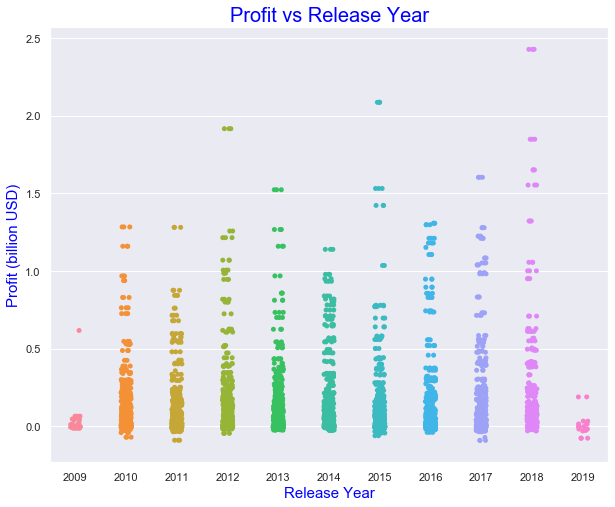

In [94]:
plt.figure(figsize=(10,8))
ax1=sns.stripplot(x=df_merged.release_year, y=df_merged.Profit/1000000000, data = df_merged)
ax1.set_title('Profit vs Release Year',fontsize=20,color='blue')
ax1.set_xlabel('Release Year',fontsize=15,color='blue')
ax1.set_ylabel('Profit (billion USD)',fontsize=15,color='blue');

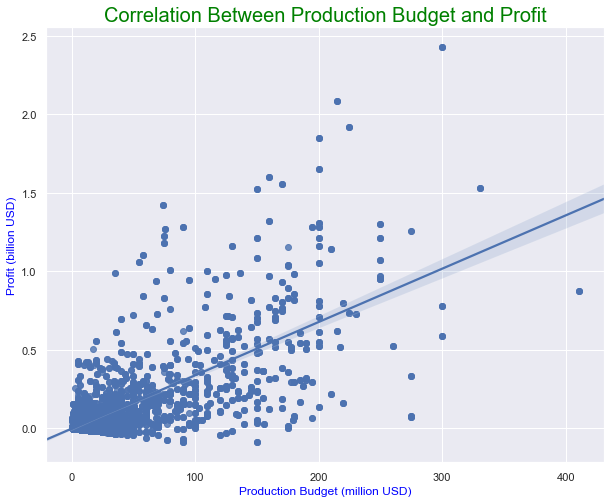

In [95]:
plt.figure(figsize=(10,8))
sns.regplot( x=df_merged.production_budget/1000000, y=df_merged.Profit/1000000000, data=df_merged)
plt.title('Correlation Between Production Budget and Profit', fontsize=20,color='green')
plt.ylabel('Profit (billion USD)', color='blue')
plt.xlabel('Production Budget (million USD)',color='blue');

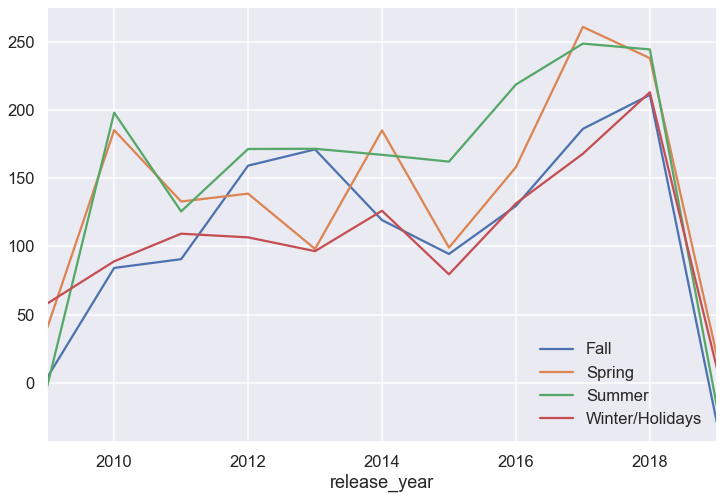

In [110]:
df_season_profit = (df_merged.groupby(['release_year','release_season'])['Profit'].mean()/1000000).sort_values(ascending=False)
df_season_profit.head()
sns.set_context('talk')
fig = df_season_profit.unstack().plot(kind = 'line')
fig.legend(loc='lower right', frameon=False);
#fig.get_legend().set_bbox_to_anchor((.8532,.3));

#plt.savefig("chart1")
#fig = df_season_profit.plot(kind = 'bar')
#plt.title('Release Season vs Profit',fontsize=18,color='green')
#plt.xlabel('Release Season',fontsize=15)
#plt.ylabel('Profit (million USD)',fontsize=15)
#plt.rcParams["figure.figsize"] = [8, 5];

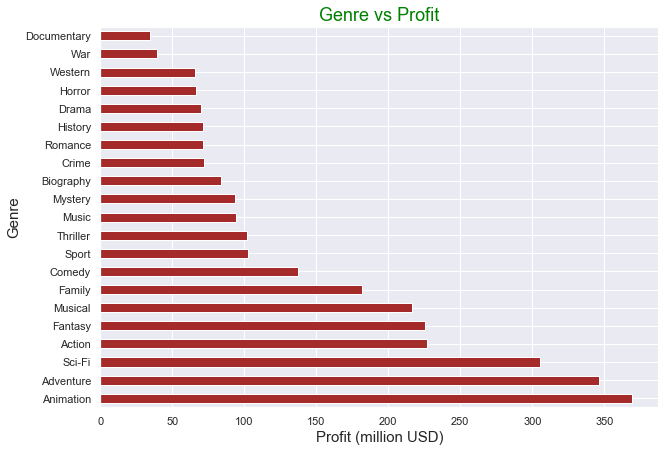

In [109]:
df_gen_profit = (df_merged.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
df_gen_profit.head()
#sns.set_context('talk')
fig = df_gen_profit.plot(kind = 'barh',color='brown')
plt.title('Genre vs Profit',fontsize=18,color='green')
plt.xlabel('Profit (million USD)',fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.rcParams["figure.figsize"] = [12, 8];

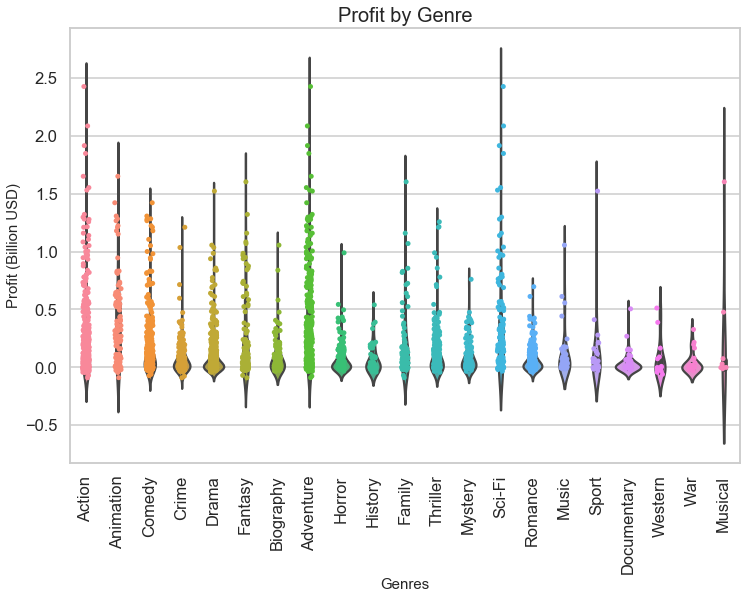

In [111]:
# Profit according to Genre
df_groupbygen=df_merged[['genres','Profit']]
df_groupbygen.info

df_groupbygen.sort_values(by=['Profit'],ascending=False)

plt.figure(figsize=(12,8))
# Set theme
sns.set_style('whitegrid')
plt.title("Profit by Genre", fontsize=20)
# Violin plot
ax=sns.violinplot(x=df_groupbygen.genres, y=df_groupbygen.Profit/1000000000, data=df_groupbygen)
ax=sns.stripplot(x=df_groupbygen.genres, y=df_groupbygen.Profit/1000000000, data=df_groupbygen)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Profit (Billion USD)',fontsize=15)
plt.xticks(rotation=90);

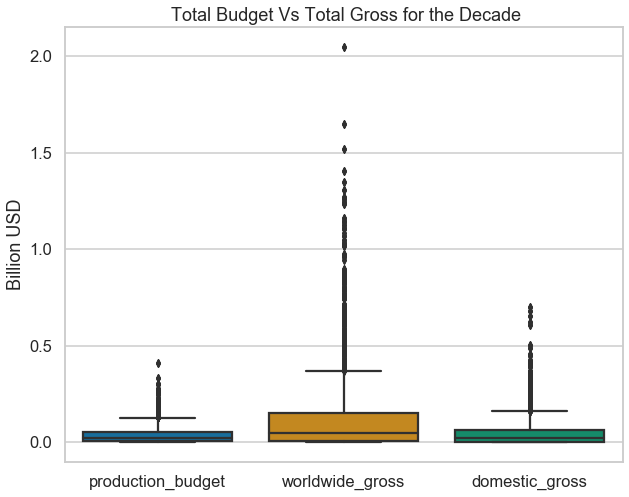

In [99]:
profit_gross_df = df_merged.filter(['production_budget', 'worldwide_gross', 'domestic_gross'], axis=1)
boxplot = sns.boxplot(data=profit_gross_df/1000000000, palette="colorblind")
boxplot.set(ylabel='Billion USD', title=' Total Budget Vs Total Gross for the Decade');

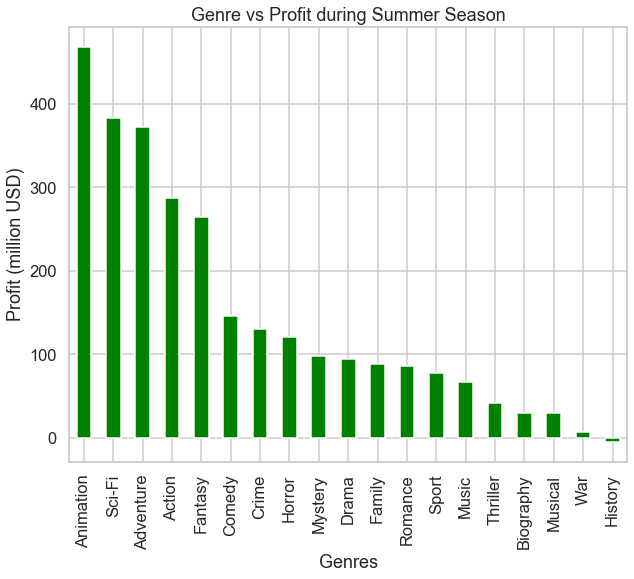

In [100]:
df_summer=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Summer')]
df_summer_plot = (df_summer.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig1 = df_summer_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Summer Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [5, 5];

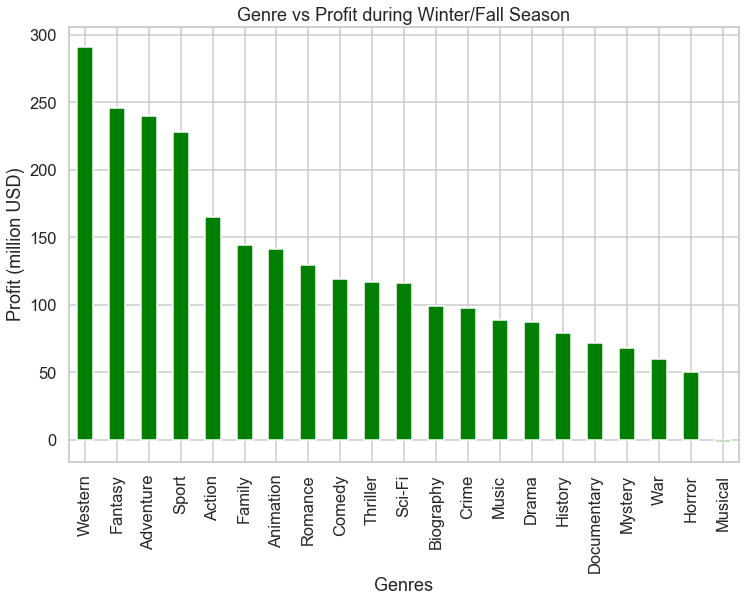

In [112]:
df_winter=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Winter/Holidays')]
df_winter_plot = (df_winter.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig2 = df_winter_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Winter/Fall Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [5, 5];

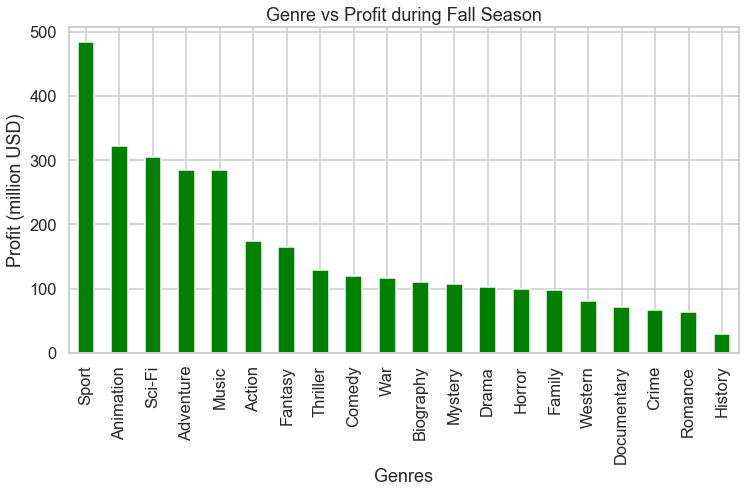

In [115]:
df_fall=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Fall')]
df_fall_plot = (df_fall.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig3 = df_fall_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Fall Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [12, 6];

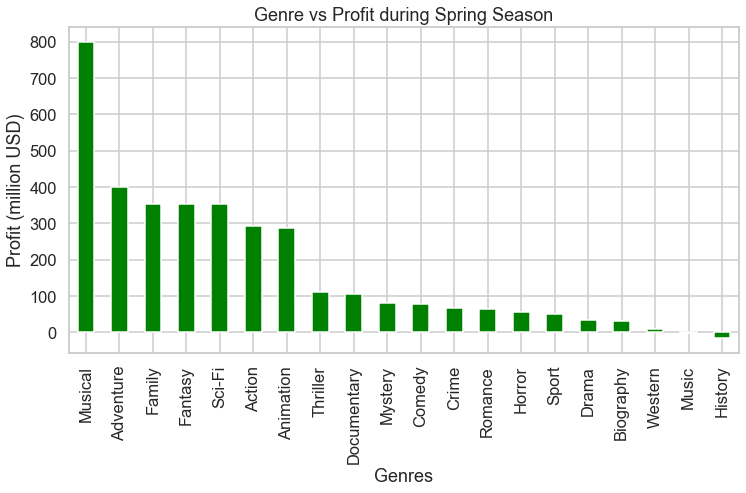

In [116]:
df_spring=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Spring')]
df_spring_plot = (df_spring.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig4 = df_spring_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Spring Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [12, 6];

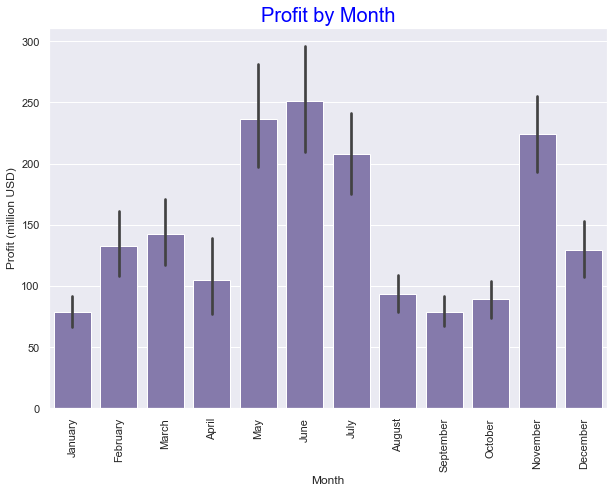

In [104]:
df_merged = df_merged.sort_values(by='release_month', ascending=True)
sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
h=sns.barplot(x=df_merged.Month,y=df_merged.Profit/1000000,color="m")
h.set_xticklabels(h.get_xticklabels(),rotation=90)
h.set_title("Profit by Month", color='blue', fontsize=20) 
h.set(xlabel='Month', ylabel='Profit (million USD)')
plt.show();

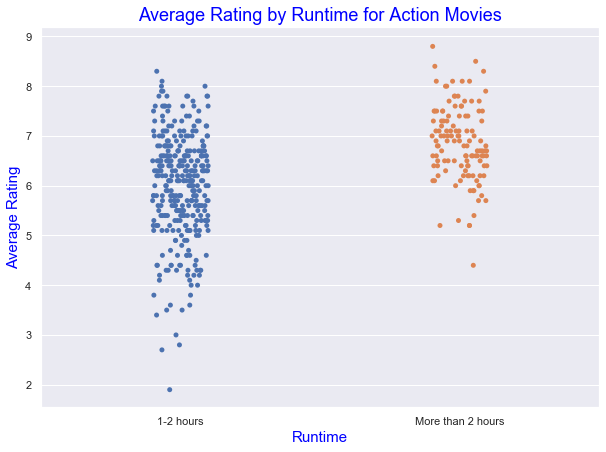

In [105]:
df_action=df_merged[(df_merged['genres']=='Action')]
df_action
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_action)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Action Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

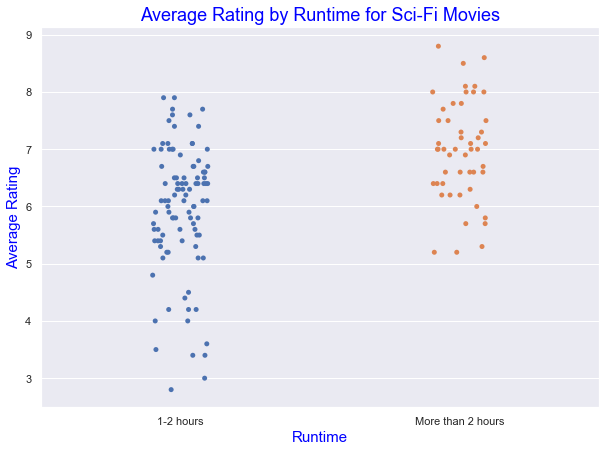

In [106]:
df_sci=df_merged[(df_merged['genres']=='Sci-Fi')]
df_sci
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_sci)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Sci-Fi Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

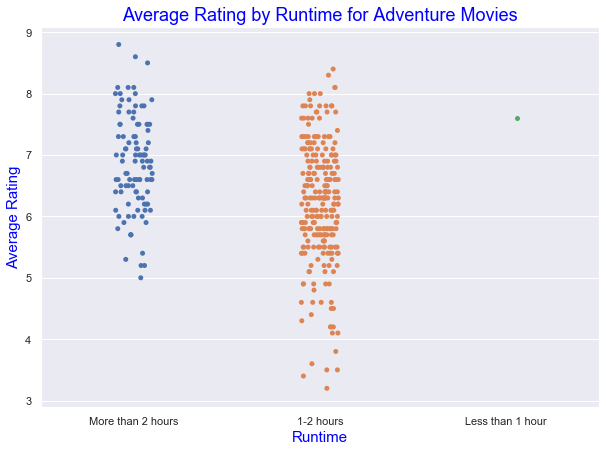

In [107]:
df_adv=df_merged[(df_merged['genres']=='Adventure')]
df_adv
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_adv)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Adventure Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

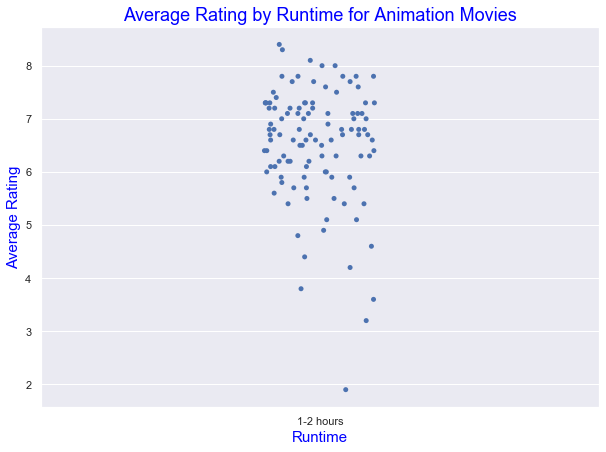

In [108]:
df_anim=df_merged[(df_merged['genres']=='Animation')]
df_anim
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_anim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Animation Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');